<a href="https://colab.research.google.com/github/jcorner1/PhD_UVA_Repo/blob/main/Create_Precip_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create Precip Model

In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!tar -xvf "/content/drive/My Drive/Colab Notebooks/model_datasets.tar.gz" -C "/content/drive/My Drive/Colab Notebooks/UVA"

Model_Datasets/
Model_Datasets/Y_avgprecip_val.pkl
Model_Datasets/Y_avgprecip_train.pkl
Model_Datasets/X_test.pkl
Model_Datasets/Y_avgprecip_test.pkl
Model_Datasets/X_train.pkl
Model_Datasets/X_val.pkl
Model_Datasets/Y_maxprecip_val.pkl
Model_Datasets/Y_maxprecip_test.pkl
Model_Datasets/Y_maxprecip_train.pkl


In [3]:
import tensorflow as tf
import keras
from keras import layers
import pickle
import numpy as np

In [4]:
#load the train, val, and test data
with open("/content/drive/My Drive/Colab Notebooks/UVA/Model_Datasets/X_train.pkl", "rb") as f:
    x_train = pickle.load(f)
with open("/content/drive/My Drive/Colab Notebooks/UVA/Model_Datasets/Y_maxprecip_train.pkl", "rb") as f:
    y_max_train = pickle.load(f)
with open("/content/drive/My Drive/Colab Notebooks/UVA/Model_Datasets/Y_avgprecip_train.pkl", "rb") as f:
    y_avg_train = pickle.load(f)

with open("/content/drive/My Drive/Colab Notebooks/UVA/Model_Datasets/X_val.pkl", "rb") as f:
    x_val = pickle.load(f)
with open("/content/drive/My Drive/Colab Notebooks/UVA/Model_Datasets/Y_maxprecip_val.pkl", "rb") as f:
    y_max_val = pickle.load(f)
with open("/content/drive/My Drive/Colab Notebooks/UVA/Model_Datasets/Y_avgprecip_val.pkl", "rb") as f:
    y_avg_val = pickle.load(f)

with open("/content/drive/My Drive/Colab Notebooks/UVA/Model_Datasets/X_test.pkl", "rb") as f:
    x_test = pickle.load(f)
with open("/content/drive/My Drive/Colab Notebooks/UVA/Model_Datasets/Y_maxprecip_test.pkl", "rb") as f:
    y_max_test = pickle.load(f)
with open("/content/drive/My Drive/Colab Notebooks/UVA/Model_Datasets/Y_avgprecip_test.pkl", "rb") as f:
    y_avg_test = pickle.load(f)

In [5]:
!nvidia-smi

Tue Nov  5 21:36:56 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [6]:
#change from list to np.array
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test = np.array(x_test)

y_max_train = np.array(y_max_train)[0]
y_max_val = np.array(y_max_val)[0]
y_max_test = np.array(y_max_test)[0]

y_avg_train = np.array(y_avg_train)[0]
y_avg_val = np.array(y_avg_val)[0]
y_avg_test = np.array(y_avg_test)[0]

print(x_train.shape)
print(y_max_train.shape)

(39641, 3, 30, 49)
(39641,)


In [7]:
#create model
model = keras.Sequential(
    [
        #keras.Input(shape=(3, 30, 49, 1)),
        layers.Conv3D(12, kernel_size=3, activation="relu", padding='same', input_shape=(3, 30, 49, 1)),
        layers.Conv3D(24, kernel_size=3, activation="relu", padding='same'),
        layers.AveragePooling3D(pool_size=1),
        layers.Conv3D(48, kernel_size=3, activation="relu", padding='same'),
        layers.AveragePooling3D(pool_size=1),
        layers.Flatten(),
        layers.Dense(1),
    ]
)

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv3d (Conv3D)                      │ (None, 3, 30, 49, 12)       │             336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_1 (Conv3D)                    │ (None, 3, 30, 49, 24)       │           7,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling3d (AveragePooling3D) │ (None, 3, 30, 49, 24)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_2 (Conv3D)                    │ (None, 3, 30, 49, 48)       │          31,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling3d_1                  │ (None, 3, 30, 49, 48)       │               0 │
│ (AveragePooling3D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 211680)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │         211,681 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 250,969 (980.35 KB)

 Trainable params: 250,969 (980.35 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
#stop training early if loss stablizes for 5 epochs
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [9]:
#train the model
model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])
history = model.fit(x_train, y_max_train,
                    epochs=100, validation_data=(x_val, y_max_val), callbacks=[stop_early])


Epoch 1/100
1239/1239 ━━━━━━━━━━━━━━━━━━━━ 98s 74ms/step - accuracy: 0.0069 - loss: 159.1288 - val_accuracy: 0.0064 - val_loss: 108.9455
Epoch 2/100
1239/1239 ━━━━━━━━━━━━━━━━━━━━ 134s 71ms/step - accuracy: 0.0066 - loss: 99.6136 - val_accuracy: 0.0073 - val_loss: 100.7693
Epoch 3/100
1239/1239 ━━━━━━━━━━━━━━━━━━━━ 140s 70ms/step - accuracy: 0.0067 - loss: 88.9890 - val_accuracy: 0.0016 - val_loss: 101.5890
Epoch 4/100
1239/1239 ━━━━━━━━━━━━━━━━━━━━ 144s 72ms/step - accuracy: 0.0075 - loss: 81.9488 - val_accuracy: 0.0077 - val_loss: 93.6279
Epoch 5/100
1239/1239 ━━━━━━━━━━━━━━━━━━━━ 141s 71ms/step - accuracy: 0.0079 - loss: 75.7694 - val_accuracy: 0.0096 - val_loss: 95.8237
Epoch 6/100
1239/1239 ━━━━━━━━━━━━━━━━━━━━ 142s 71ms/step - accuracy: 0.0076 - loss: 70.8741 - val_accuracy: 0.0073 - val_loss: 92.0309
Epoch 7/100
1239/1239 ━━━━━━━━━━━━━━━━━━━━ 141s 70ms/step - accuracy: 0.0078 - loss: 62.4773 - val_accuracy: 0.0062 - val_loss: 93.7990
Epoch 8/100
1239/1239 ━━━━━━━━━━━━━━━━━━━━ 14

In [10]:
# test the model
y_pred = model.predict(x_test)

356/356 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step


In [11]:
#calculate a R-squared value
metric = keras.metrics.R2Score()
metric.update_state(y_max_test, y_pred)
result = metric.result()
print(f'R-Squared value: {result.numpy()}')

R-Squared value: 0.7483782768249512


In [12]:
print(f'Max Precip value is off by average of {np.mean(y_max_test[np.argpartition(y_max_test, -10)[-10:]]-y_pred[np.argpartition(y_max_test, -10)[-10:]].flatten())}mm for top 10 events.')

Max Precip value is off by average of 43.83856695556641mm for top 10 events.


Text(0.5, 0, 'Event')

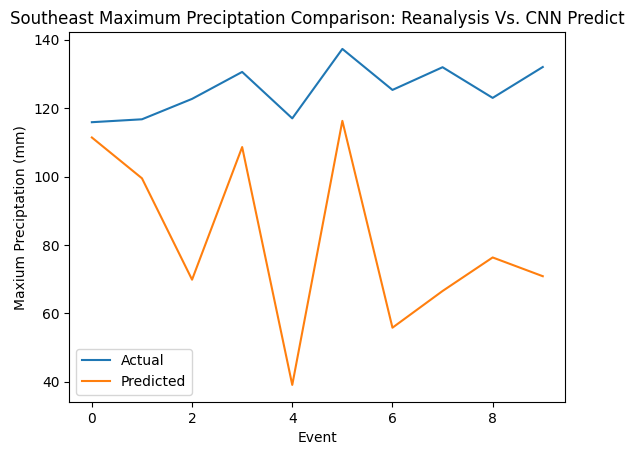

In [13]:
from matplotlib import pyplot as plt
plt.plot(y_max_test[np.argpartition(y_max_test, -10)[-10:]])
plt.plot(y_pred[np.argpartition(y_max_test, -10)[-10:]].flatten())

plt.title('Southeast Maximum Preciptation Comparison: Reanalysis Vs. CNN Predict')
plt.legend(['Actual', 'Predicted'], loc='lower left')
plt.ylabel('Maxium Preciptation (mm)')
plt.xlabel('Event')

In [14]:
#save the model
model.save("/content/drive/My Drive/Colab Notebooks/UVA/max_precip_model.keras")